## ABP MACHINE LEARNING

### Classificação de emails em spam ou não

Dataset: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/

In [ ]:
# Importação das bibliiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Ler o dataset de frequencia de palavras em emails
df = pd.read_csv('emails.csv')

## Seleção e Preparação de Dados

In [ ]:
# Pegar apenas as primeiras 2000 linhas do dataset
df = df.head(1000)
# Dropa valores não numéricos
df = df.dropna()

In [ ]:
# Printa o dataset
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Email 996,6,7,1,1,2,1,28,1,0,...,0,0,0,0,0,0,0,0,0,0
996,Email 997,0,0,1,0,0,1,3,0,0,...,0,0,0,0,0,0,0,1,0,1
997,Email 998,5,7,14,2,4,2,83,2,6,...,0,0,0,0,0,0,0,2,0,0
998,Email 999,8,3,2,0,4,4,40,3,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropa a primeira coluna de numeração de email deixando como valores de entrada o restante do dataset
X = df.drop(['Email No.'], axis=1)
# Passa para variável de saída a predição se é spam ou não (1 é spam, 0 não)
y = df['Prediction']

In [ ]:
# Separação de treino e teste 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,1,1,2,1,28,1,0,11,...,0,0,0,0,0,0,0,0,0,0
996,0,0,1,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,1,0,1
997,5,7,14,2,4,2,83,2,6,7,...,0,0,0,0,0,0,0,2,0,0
998,8,3,2,0,4,4,40,3,0,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

0    715
1    285
Name: Prediction, dtype: int64

## Funções

In [ ]:
def plt_graphic_best_params(model, best_params):
  # Substituir None por um valor padrão (por exemplo, 0)
  best_params = {key: value if value is not None else 0 for key, value in best_params.items()}

  # Criar um gráfico de barras
  labels = list(best_params.keys())
  values = list(best_params.values())

  fig, ax = plt.subplots()
  ax.bar(labels, values, color=['blue', 'green'])
  ax.set_ylabel('Valor')
  ax.set_title(f'Melhores Hiperparâmetros para {model}')

  plt.show()

In [ ]:
# Função para gerar gráfico com modelos preditados
def graphicsGridSearchModels(y_pred_model, model):
  # Analisar o relatório de classificação
  report_dict = classification_report(y_test, y_pred_model, target_names=['Não Spam', 'Spam'], output_dict=True)

  # Extrair métricas
  precision = [report_dict[label]['precision'] for label in ['Não Spam', 'Spam']]
  recall = [report_dict[label]['recall'] for label in ['Não Spam', 'Spam']]
  f1_score = [report_dict[label]['f1-score'] for label in ['Não Spam', 'Spam']]

  classifications = ("Não Spam", "Spam")
  classification_infos = {
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1_score,
  }

  x = np.arange(len(classifications))  # the label locations
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in classification_infos.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Score %')
  ax.set_title(f'{model} - Precision, Recall, e F1-Score para Não Spam e Spam')
  ax.set_xticks(x + width, classifications)
  ax.legend(loc='upper left', ncols=3)
  ax.set_ylim(0, 1.20)

  plt.show()


## Modelagem e Otimização de Hiperparâmetros

Modelos Usados:

- Random Forest
- SVM (Support Vector Machine)
- KNN (K Nearest Neighbor)

In [ ]:
# Importando bibliotefca GridSearchCV
from sklearn.model_selection import GridSearchCV
# Importando biblioteca de Random Forest do sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Modelos selecionados
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Hiperparâmetros dos modelos
params = {
    'Random Forest': {
      'n_estimators': [50, 100, 200, 300], # Número de árvores na floresta
      'max_depth': [None, 10, 20, 30] # Profundidade máxima de cada árvore
    },
    'SVM': {
        'C': [0.1, 1, 10], # Parâmetro de regularização
        'kernel': ['linear', 'rbf', 'poly'], # Tipo de kernel ('linear', 'rbf', 'poly')
    },
    'KNN': {
        'n_neighbors': [3, 5, 7], # Número de vizinhos considerados
        'weights': ['uniform', 'distance'], # Ponderação dos vizinhos ('uniform', 'distance')
    }
}

# Armazenar previsões
predictions = {}
# Armazenar os melhores params
params_models = {}
# Armazena o melhor modelo
best_models = {}

In [ ]:
# Loop sobre modelos
for model_name, model in models.items():
    # Obtenha os hiperparâmetros correspondentes
    param_grid = params[model_name]

    # Crie o objeto GridSearchCV para o modelo atual
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

    # Treine o modelo usando GridSearchCV
    grid_search.fit(X_train, y_train)

    # Imprima os melhores hiperparâmetros para o modelo atual
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

    # Faça a previsão no conjunto de teste
    y_pred = grid_search.predict(X_test)

    # Armazene as previsões no dicionário
    predictions[model_name] = y_pred

    # Armazena os modelos
    best_models[model_name] = grid_search

    # Armazene os melhores parametros de cada modelo
    params_models[model_name] = grid_search.best_params_

    # Imprima o relatório de classificação para o modelo atual
    print(f"Relatório de Classificação para {model_name}:\n{classification_report(y_test, y_pred)}")

Melhores hiperparâmetros para Random Forest: {'max_depth': 30, 'n_estimators': 100}
Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        53

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Melhores hiperparâmetros para SVM: {'C': 0.1, 'kernel': 'linear'}
Relatório de Classificação para SVM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.96      0.91      0.93        53

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.96      0.96       200

Melhores hiperparâmetros para KNN: {'n_neighbors': 3, 'weights': 'distance'}
Relatório de Classificação para KNN

## Identificação da Melhor Configuração

In [ ]:
# Melhores Hiperparâmetros, predições e modelo
best_params = params_models['Random Forest']
best_model = best_models['Random Forest']
best_y_prediction = predictions['Random Forest']

In [ ]:
accuracyRF = accuracy_score(y_test, best_y_prediction)
# random forest {'max_depth': 30, 'n_estimators': 100}
print(f'Acurácia de Random Forest: {accuracyRF:.2%}. Melhores parâmetros: {best_params}')

Acurácia de Random Forest: 100.00%. Melhores parâmetros: {'max_depth': 30, 'n_estimators': 100}


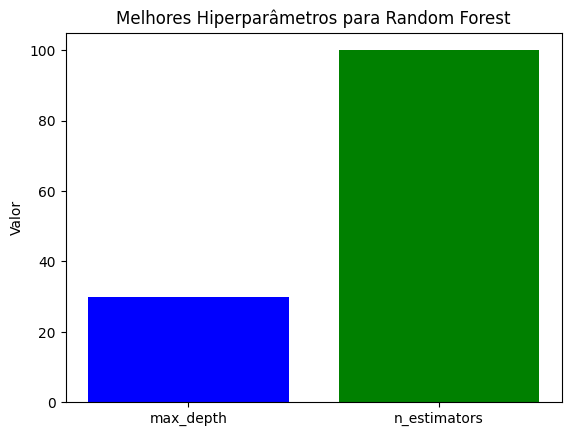

In [ ]:
# Plota gráfico dos melhores Hiperparâmetros de Random Forest
plt_graphic_best_params('Random Forest', best_params)

In [ ]:
# Treinando o modelo com os melhores hiperparâmetros encontrados
# best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_model = best_models['Random Forest']
best_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Importando as libs para exportar a arquitetura da figura
from sklearn.tree import plot_tree, export_graphviz
import graphviz

In [ ]:
# Realizando predição do Random Forest usando o melhor modelo
y_pred_best = predictions['Random Forest']
print("Relatório de Classificação para SVM:")
print(classification_report(y_test, y_pred_best))

Relatório de Classificação para SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        53

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Avaliação de Desempenho

In [ ]:
# Relatório de classificação do melhor modelo selecionado usando Classification Report
print("Relatório de Classificação para Random Forest:")
print(classification_report(y_test, best_y_prediction))

Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        53

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



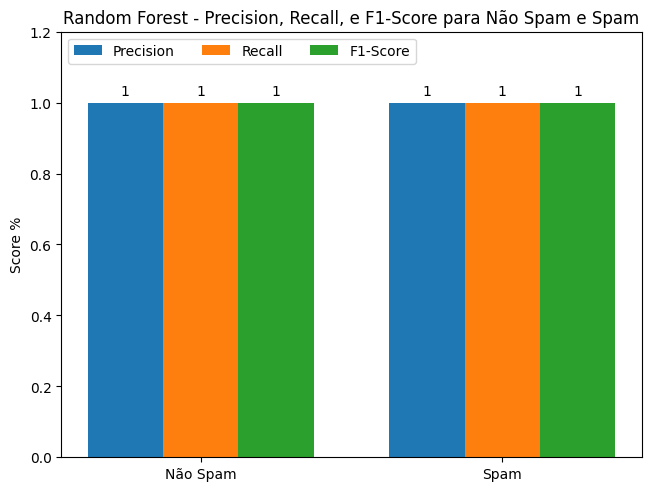

In [ ]:
# Graficos do Modelo de Random Forest
graphicsGridSearchModels(best_y_prediction, 'Random Forest')

### Exportando o modelo treinado

In [ ]:
# Importando biblioteca para exportar arquivo
import pickle

In [ ]:
model = best_model

In [ ]:
# Salva o arquivo no formato para usar na api em flask
pkl_filename = "best_random_forest_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Carrega o arquivo exportado
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
# Previsão com os dados de teste
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Ypredict = pickle_model.predict(X_test)

Test score: 99.00 %
